In [1]:
import pandas as pd
import os
import json
import scipy
from scipy import stats

path = "../New Data"
os.listdir(path)

['Feeling pain and pressure in chest_Reports_over_Districts.csv',
 'Not getting smell_Reports_over_Districts.csv',
 'Dry cough_Reports_over_Districts.csv',
 'Diabetes_Reports_over_Districts.csv',
 'Kidney problem_Reports_over_Districts.csv',
 'Fever_Reports_over_Districts.csv',
 'Sore throat_Reports_over_Districts.csv',
 'Difficulty in breathing_Reports_over_Districts.csv',
 'High blood pressure_Reports_over_Districts.csv',
 'High fever_Reports_over_Districts.csv',
 'Weakness_Reports_over_Districts.csv',
 'Itching eyes or turning red_Reports_over_Districts.csv',
 'Sleepiness_Reports_over_Districts.csv',
 'Respiratory illness_Reports_over_Districts.csv',
 'Feeling testless_Reports_over_Districts.csv',
 'Muscle pain_Reports_over_Districts.csv',
 'Abdominal pain, nausea or thin closet_Reports_over_Districts.csv',
 'Cancer_Reports_over_Districts.csv',
 'Heart diseases_Reports_over_Districts.csv']

In [2]:
df = pd.read_csv(path + "/High fever_Reports_over_Districts.csv")
print(df.shape)
df.head()

(358, 66)


,date,Sunamganj,Comilla,Manikganj,Kishoreganj,Kushtia,Sirajganj,Jhenaidah,Rangamati,Chittagong,...,Madaripur,Bogra,Brahmanbaria,Barguna,Barisal,Bhola,Jessore,Gaibandha,Lalmonirhat,Panchagarh
0,2020-04-03,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
1,2020-04-04,1,0,0,2,0,2,0,0,7,...,0,0,0,0,1,0,2,0,0,0
2,2020-04-05,0,1,1,1,0,0,0,0,4,...,2,0,2,0,0,0,1,0,0,0
3,2020-04-06,3,4,0,0,0,1,3,0,4,...,0,0,0,1,2,1,0,0,0,0
4,2020-04-07,0,0,1,0,0,3,1,0,4,...,1,0,0,0,2,0,1,0,0,0


In [3]:
district_arr = df.keys()[1:]
district_arr = list(district_arr)
district_arr

['Sunamganj',
 'Comilla',
 'Manikganj',
 'Kishoreganj',
 'Kushtia',
 'Sirajganj',
 'Jhenaidah',
 'Rangamati',
 'Chittagong',
 'Nilphamari',
 'Thakurgaon',
 'Pabna',
 'Rajshahi',
 "Cox's Bazar",
 'Sylhet',
 'Tangail',
 'Chapainawabganj',
 'Magura',
 'Bagerhat',
 'Munshiganj',
 'Feni',
 'Maulvibazar',
 'Chuadanga',
 'Kurigram',
 'Netrokona',
 'Meherpur',
 'Narsingdi',
 'Pirojpur',
 'Gopalganj',
 'Mymensingh',
 'Khulna',
 'Jhalokati',
 'Narayanganj',
 'Lakshmipur',
 'Khagrachhari',
 'Noakhali',
 'Jamalpur',
 'Unknown',
 'Chandpur',
 'Patuakhali',
 'Narail',
 'Jaipurhat',
 'Gazipur',
 'Natore',
 'Sherpur',
 'Rajbari',
 'Habiganj',
 'Dhaka',
 'Naogaon',
 'Satkhira',
 'Faridpur',
 'Dinajpur',
 'Shariatpur',
 'Bandarban',
 'Rangpur',
 'Madaripur',
 'Bogra',
 'Brahmanbaria',
 'Barguna',
 'Barisal',
 'Bhola',
 'Jessore',
 'Gaibandha',
 'Lalmonirhat',
 'Panchagarh']

In [4]:
def getMonthTrackfromDF__districtwise(df):
    dist_track = {}
    month_track = []
    for district in district_arr:
        if(district not in dist_track):
            dist_track[district] = {}

    for index,row in df.iterrows():
        date = row['date']
        month = date[:7]
        if(month not in month_track):
            month_track.append(month)
            for district in dist_track:
                dist_track[district][month] = 0

        for district in district_arr:
            if(district not in row):
                continue
            dist_track[district][month] += row[district]
        
    return dist_track

In [5]:
dhaka = getMonthTrackfromDF__districtwise(df)['Dhaka']
dhaka

{'2020-04': 304,
 '2020-05': 226,
 '2020-06': 314,
 '2020-07': 87,
 '2020-08': 81,
 '2020-09': 77,
 '2020-10': 27,
 '2020-11': 33,
 '2020-12': 19,
 '2021-01': 8,
 '2021-02': 1,
 '2021-04': 32,
 '2021-05': 18,
 '2021-06': 1}

In [6]:
total_symptom_data = {}
for district in district_arr:
    total_symptom_data[district] = {}
for month in dhaka:
    for district in district_arr:
        total_symptom_data[district][month] = 0

for csv in os.listdir(path):
    df = pd.read_csv(path + "/" + csv)
    month_track_districtwise = getMonthTrackfromDF__districtwise(df)
    for district in district_arr:
        for month in month_track_districtwise[district]:
            total_symptom_data[district][month] += month_track_districtwise[district][month]

total_symptom_data['Dhaka']

{'2020-04': 38148,
 '2020-05': 22158,
 '2020-06': 45455,
 '2020-07': 9281,
 '2020-08': 6540,
 '2020-09': 5457,
 '2020-10': 2865,
 '2020-11': 3411,
 '2020-12': 1786,
 '2021-01': 901,
 '2021-02': 142,
 '2021-04': 4871,
 '2021-05': 1288,
 '2021-06': 114}

In [31]:
def buildCorrelationMatrix(district_arr, limit = None):
    print(district_arr)

    print("considering monhts ---> ", end=" ")
    for month in total_symptom_data['Dhaka']:
        print(month, end=' ')
        if(month == limit):
            break
    print()

    district_values = {}
    for district in district_arr:
        district_values[district] = []
        for month in total_symptom_data[district]:
            district_values[district].append(total_symptom_data[district][month])
            # print(month)
            if(month == limit):
                # print(" ... >>> breaking")
                break
    print(district_values)
    corr_matrix = {}
    for district_1 in district_values:
        corr_matrix[district_1] = {}
        for district_2 in district_values:
            corr_matrix[district_1][district_2] = stats.pearsonr(district_values[district_1], district_values[district_2])[0]
            if(district_1 == district_2):
                break
    return corr_matrix

In [32]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
def plotMatrix(dct2D):
    # print(dct2D)
    arr2D = []
    for ik in dct2D:
        arr1D = []
        for jk in dct2D[ik]:
            arr1D.append(round(dct2D[ik][jk], 3))
        arr2D.append(arr1D)
    df_cm = pd.DataFrame(arr2D, index = list(dct2D.keys()),
                  columns = list(dct2D.keys()))
    plt.figure(figsize = (20,15))
    sn.heatmap(
        df_cm, annot=True, 
        cmap= sn.cm.rocket_r
        # cmap = "Blues"
    )
    plt.show()

In [43]:
", ".join(sorted(list(total_symptom_data.keys())))

"Bagerhat, Bandarban, Barguna, Barisal, Bhola, Bogra, Brahmanbaria, Chandpur, Chapainawabganj, Chittagong, Chuadanga, Comilla, Cox's Bazar, Dhaka, Dinajpur, Faridpur, Feni, Gaibandha, Gazipur, Gopalganj, Habiganj, Jaipurhat, Jamalpur, Jessore, Jhalokati, Jhenaidah, Khagrachhari, Khulna, Kishoreganj, Kurigram, Kushtia, Lakshmipur, Lalmonirhat, Madaripur, Magura, Manikganj, Maulvibazar, Meherpur, Munshiganj, Mymensingh, Naogaon, Narail, Narayanganj, Narsingdi, Natore, Netrokona, Nilphamari, Noakhali, Pabna, Panchagarh, Patuakhali, Pirojpur, Rajbari, Rajshahi, Rangamati, Rangpur, Satkhira, Shariatpur, Sherpur, Sirajganj, Sunamganj, Sylhet, Tangail, Thakurgaon, Unknown"

In [45]:
district_arr_dhk = ['Dhaka', 'Narayanganj', 'Narsingdi', 'Gazipur', 'Tangail', 'Gopalganj', 'Manikganj', 'Kishoreganj', 'Madaripur', 'Faridpur', 'Shariatpur', 'Munshiganj', 'Rajbari']
corr_matrix = buildCorrelationMatrix(district_arr_dhk, limit='2020-11')
corr_df = pd.DataFrame(corr_matrix)
corr_df

['Dhaka', 'Narayanganj', 'Narsingdi', 'Gazipur', 'Tangail', 'Gopalganj', 'Manikganj', 'Kishoreganj', 'Madaripur', 'Faridpur', 'Shariatpur', 'Munshiganj', 'Rajbari']
considering monhts --->  2020-04 2020-05 2020-06 2020-07 2020-08 2020-09 2020-10 2020-11 
{'Dhaka': [38148, 22158, 45455, 9281, 6540, 5457, 2865, 3411], 'Narayanganj': [3400, 1487, 3559, 623, 285, 223, 162, 127], 'Narsingdi': [840, 391, 1336, 191, 81, 63, 20, 23], 'Gazipur': [2608, 1825, 5728, 633, 212, 273, 118, 96], 'Tangail': [1084, 314, 1682, 529, 287, 173, 34, 66], 'Gopalganj': [301, 149, 625, 125, 38, 46, 18, 52], 'Manikganj': [401, 146, 709, 93, 43, 84, 44, 16], 'Kishoreganj': [789, 269, 1588, 365, 125, 143, 21, 47], 'Madaripur': [406, 96, 754, 152, 88, 52, 19, 15], 'Faridpur': [530, 296, 1316, 297, 175, 159, 38, 48], 'Shariatpur': [206, 96, 475, 145, 78, 46, 20, 12], 'Munshiganj': [403, 189, 1059, 148, 54, 44, 44, 41], 'Rajbari': [177, 81, 408, 159, 124, 40, 17, 27]}


,Dhaka,Narayanganj,Narsingdi,Gazipur,Tangail,Gopalganj,Manikganj,Kishoreganj,Madaripur,Faridpur,Shariatpur,Munshiganj,Rajbari
Dhaka,1.0,0.99339,0.980134,0.946663,0.935566,0.931937,0.948754,0.921656,0.923131,0.895156,0.886166,0.897249,0.834972
Narayanganj,NaN,1.00000,0.967276,0.916914,0.929415,0.909884,0.936213,0.904324,0.911939,0.863410,0.859762,0.870110,0.806536
Narsingdi,NaN,NaN,1.000000,0.985053,0.973587,0.983747,0.990269,0.977701,0.977152,0.961129,0.952939,0.965884,0.907964
Gazipur,NaN,NaN,NaN,1.000000,0.946294,0.989623,0.982042,0.974939,0.964851,0.978945,0.961667,0.984898,0.914225
Tangail,NaN,NaN,NaN,NaN,1.000000,0.972309,0.974126,0.987307,0.991543,0.964891,0.976304,0.954834,0.958348
Gopalganj,NaN,NaN,NaN,NaN,NaN,1.000000,0.988144,0.994260,0.986574,0.989224,0.981336,0.993562,0.943540
Manikganj,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.988326,0.988809,0.974595,0.964113,0.980929,0.917119
Kishoreganj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.996148,0.990991,0.990697,0.988032,0.961072
Madaripur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.982064,0.984438,0.981113,0.959512
Faridpur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.994065,0.992697,0.969134


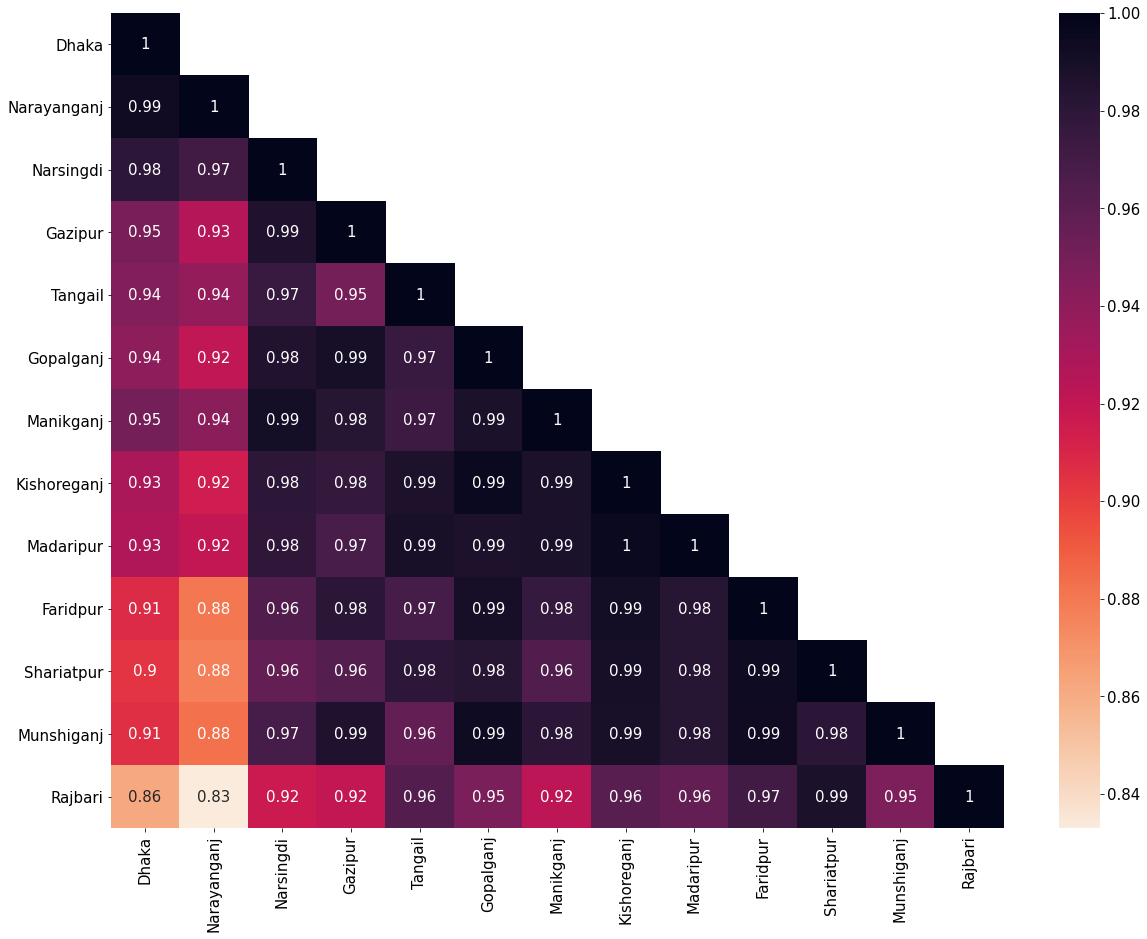

In [39]:
plt.rcParams.update({'font.size': 15})
plotMatrix(corr_matrix)

In [40]:
district_arr_ctg = ['Chittagong', 'Chandpur', 'Comilla', 'Cox\'s Bazar', 'Feni', 'Rangamati', 'Noakhali', 'Brahmanbaria', 'Lakshmipur', 'Bandarban', 'Khagrachhari']
corr_matrix = buildCorrelationMatrix(district_arr_ctg)
corr_df = pd.DataFrame(corr_matrix)
corr_df

['Chittagong', 'Chandpur', 'Comilla', "Cox's Bazar", 'Feni', 'Rangamati', 'Noakhali', 'Brahmanbaria', 'Lakshmipur', 'Bandarban', 'Khagrachhari']
considering monhts --->  2020-04 2020-05 2020-06 2020-07 2020-08 2020-09 2020-10 2020-11 2020-12 2021-01 2021-02 2021-04 2021-05 2021-06 
{'Chittagong': [4492, 3136, 11828, 1130, 404, 461, 199, 207, 209, 97, 5, 694, 165, 4], 'Chandpur': [822, 366, 2110, 222, 136, 79, 37, 27, 7, 21, 4, 77, 40, 2], 'Comilla': [1741, 718, 4955, 768, 281, 198, 79, 81, 83, 27, 27, 140, 61, 0], "Cox's Bazar": [752, 248, 1858, 128, 24, 108, 31, 14, 24, 10, 0, 116, 76, 0], 'Feni': [700, 312, 2234, 353, 214, 146, 37, 51, 26, 1, 14, 109, 63, 2], 'Rangamati': [68, 64, 363, 85, 37, 33, 8, 5, 11, 8, 3, 43, 1, 0], 'Noakhali': [894, 420, 2433, 359, 202, 128, 33, 49, 44, 17, 3, 97, 71, 0], 'Brahmanbaria': [673, 259, 1840, 301, 138, 133, 37, 33, 12, 14, 2, 126, 57, 0], 'Lakshmipur': [289, 159, 1118, 95, 53, 21, 1, 7, 1, 9, 0, 28, 13, 0], 'Bandarban': [65, 41, 350, 31, 33, 15, 

,Chittagong,Chandpur,Comilla,Cox's Bazar,Feni,Rangamati,Noakhali,Brahmanbaria,Lakshmipur,Bandarban,Khagrachhari
Chittagong,1.0,0.994851,0.989766,0.989955,0.984973,0.960021,0.992418,0.987693,0.987532,0.971073,0.938746
Chandpur,NaN,1.000000,0.997331,0.996149,0.993920,0.963380,0.998578,0.996440,0.992351,0.978783,0.948538
Comilla,NaN,NaN,1.000000,0.992320,0.997863,0.975190,0.999127,0.998539,0.994379,0.984280,0.937951
Cox's Bazar,NaN,NaN,NaN,1.000000,0.987893,0.952822,0.992855,0.993086,0.987632,0.971431,0.951722
Feni,NaN,NaN,NaN,NaN,1.000000,0.983525,0.997640,0.998128,0.995691,0.991233,0.919819
Rangamati,NaN,NaN,NaN,NaN,NaN,1.000000,0.973258,0.976270,0.980424,0.986769,0.852856
Noakhali,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.998542,0.993689,0.983211,0.940219
Brahmanbaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.992063,0.982792,0.939311
Lakshmipur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.995154,0.905493
Bandarban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.867554


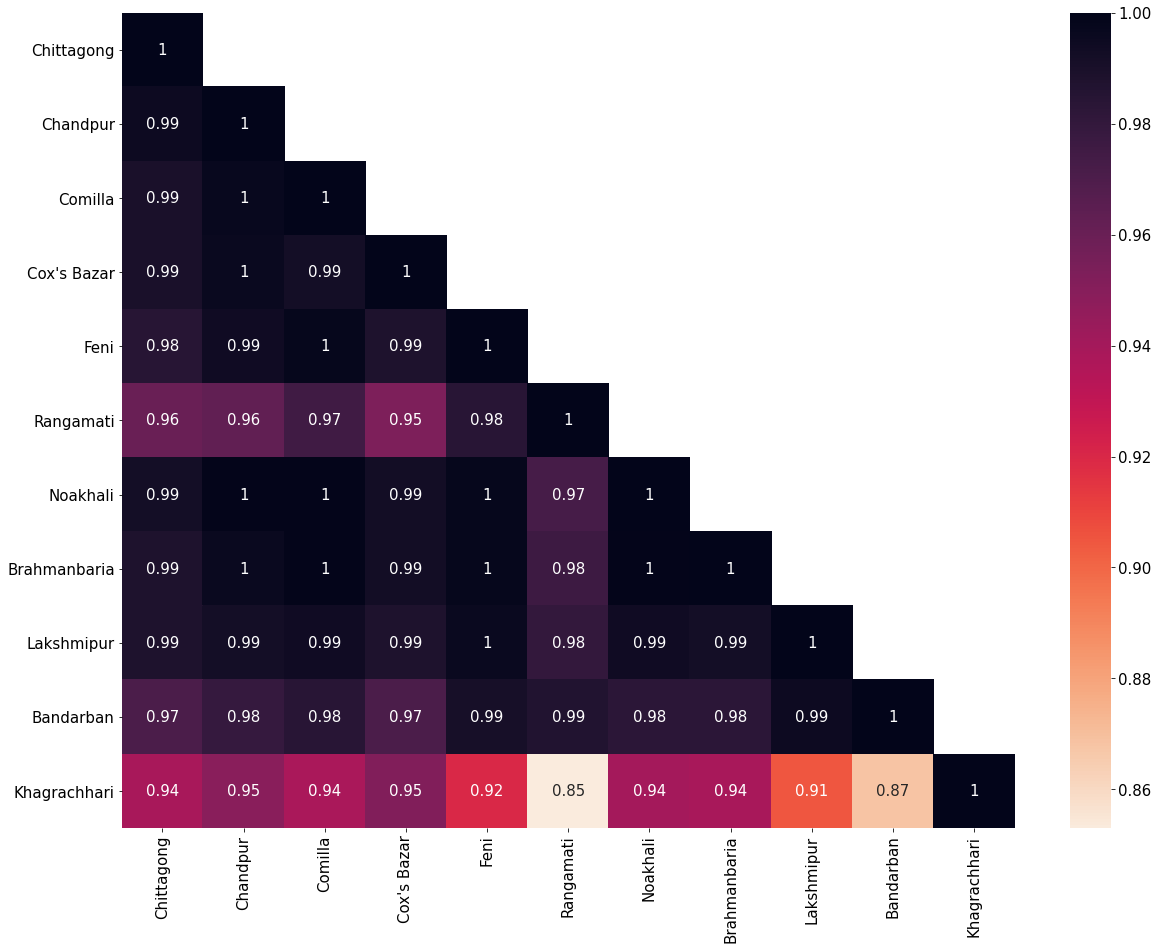

In [41]:
plt.rcParams.update({'font.size': 15})
plotMatrix(corr_matrix)